In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-drop-out-prediction/train.csv
/kaggle/input/students-drop-out-prediction/test.csv


# Data Loading and EDA

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/kaggle/input/students-drop-out-prediction/train.csv")

In [4]:
print(f"Shape:- {df.shape}")
print(f"Nan Values:-{df.isna().sum().sum()}")
df.head()

Shape:- (3796, 43)
Nan Values:-0


,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
0,0,3,6,11,55,1,1,16,5,60,...,-0.3,0.79,1,93,47,1,48,26,0,1
1,1,8,94,12,65,1,4,22,4,173,...,5.4,6.51,6,29,37,25,53,35,7,2
2,2,3,166,10,155,1,1,16,1,309,...,0.6,2.02,1,8,34,4,43,38,2,1
3,3,3,6,13,121,1,1,16,1,6,...,0.6,2.02,7,37,40,27,43,65,0,1
4,4,4,51,18,21,1,17,22,118,168,...,8.4,12.51,16,22,25,25,24,23,1,1


In [5]:
y = df['label']
df.drop(labels = ['id' , 'label'] , axis = 1 , inplace = True)

In [6]:
print(y.shape)
print(df.shape)
df.head()

(3796,)
(3796, 41)


,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,3,6,11,55,1,1,16,5,60,30,...,13.9,-0.3,0.79,1,93,47,1,48,26,0
1,8,94,12,65,1,4,22,4,173,199,...,14.9,5.4,6.51,6,29,37,25,53,35,7
2,3,166,10,155,1,1,16,1,309,30,...,11.1,0.6,2.02,1,8,34,4,43,38,2
3,3,6,13,121,1,1,16,1,6,23,...,11.1,0.6,2.02,7,37,40,27,43,65,0
4,4,51,18,21,1,17,22,118,168,106,...,10.9,8.4,12.51,16,22,25,25,24,23,1


In [7]:
df.describe()

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
count,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,...,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000
mean,4.817439,70.825606,11.609062,99.329294,0.911486,3.436249,18.970495,97.203372,166.138567,57.441254,...,12.394810,2.041333,0.835901,5.341149,50.674658,26.212065,20.837197,31.276607,40.210485,3.278978
std,6.166860,56.110329,2.576362,45.017380,0.284079,4.577644,15.010042,79.213308,103.121322,50.416264,...,3.414303,2.516779,3.109413,3.507388,29.330820,14.929649,11.984063,17.847942,22.466458,2.618851
min,3.000000,6.000000,9.000000,9.000000,0.000000,1.000000,16.000000,1.000000,6.000000,3.000000,...,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,6.000000,10.000000,55.000000,1.000000,1.000000,16.000000,5.000000,60.000000,23.000000,...,9.400000,0.500000,-1.700000,3.000000,25.000000,13.000000,11.000000,16.000000,21.750000,1.000000
50%,3.000000,89.000000,10.000000,101.000000,1.000000,1.000000,16.000000,110.000000,168.000000,30.000000,...,12.400000,1.400000,0.790000,5.000000,50.000000,26.000000,21.000000,31.000000,41.000000,3.000000
75%,4.000000,116.000000,12.000000,146.000000,1.000000,3.000000,16.000000,181.000000,251.000000,103.000000,...,14.900000,2.800000,2.020000,8.000000,76.000000,39.000000,31.000000,47.000000,59.000000,5.000000
max,61.000000,176.000000,25.000000,176.000000,1.000000,25.000000,179.000000,289.000000,322.000000,324.000000,...,25.200000,12.700000,12.510000,18.000000,107.000000,58.000000,49.000000,69.000000,87.000000,14.000000


<AxesSubplot:>

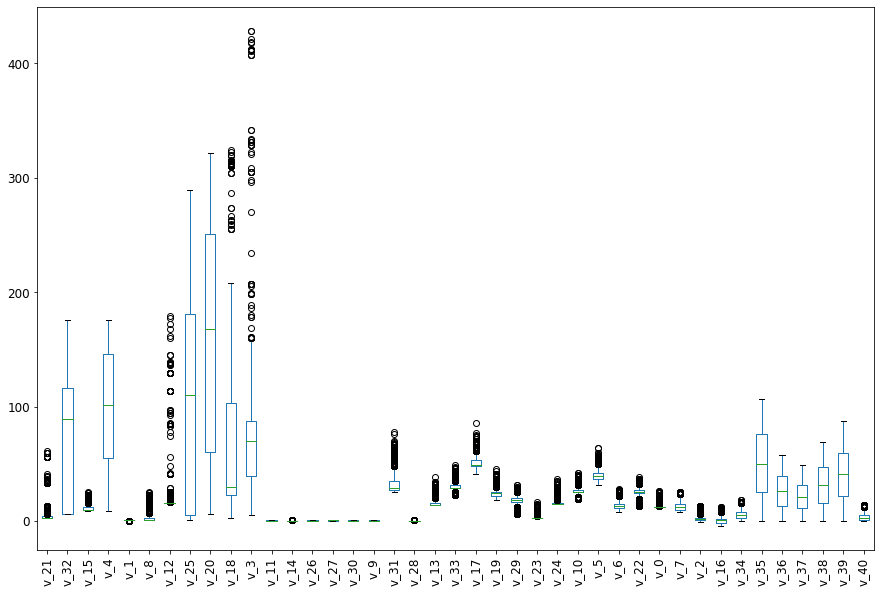

In [8]:
df.boxplot(fontsize = 12 , rot = 90, figsize = (15 , 10) , grid = False)

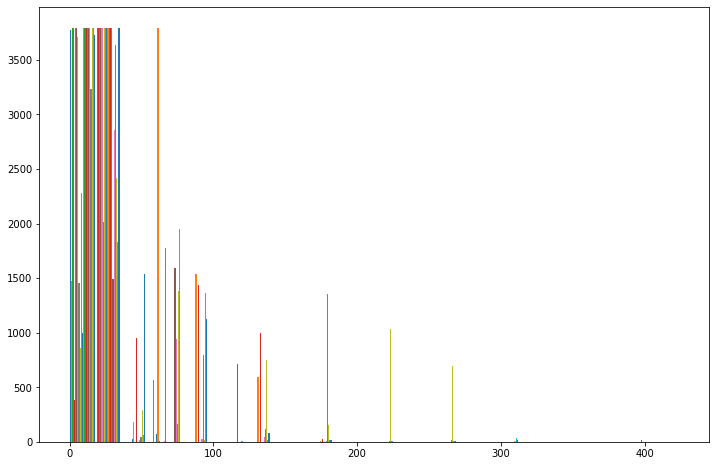

In [9]:
fig_dims = (12 , 8)
fig,ax = plt.subplots(figsize = fig_dims)
plt.hist(df[df.columns]);

In [10]:
?df.hist

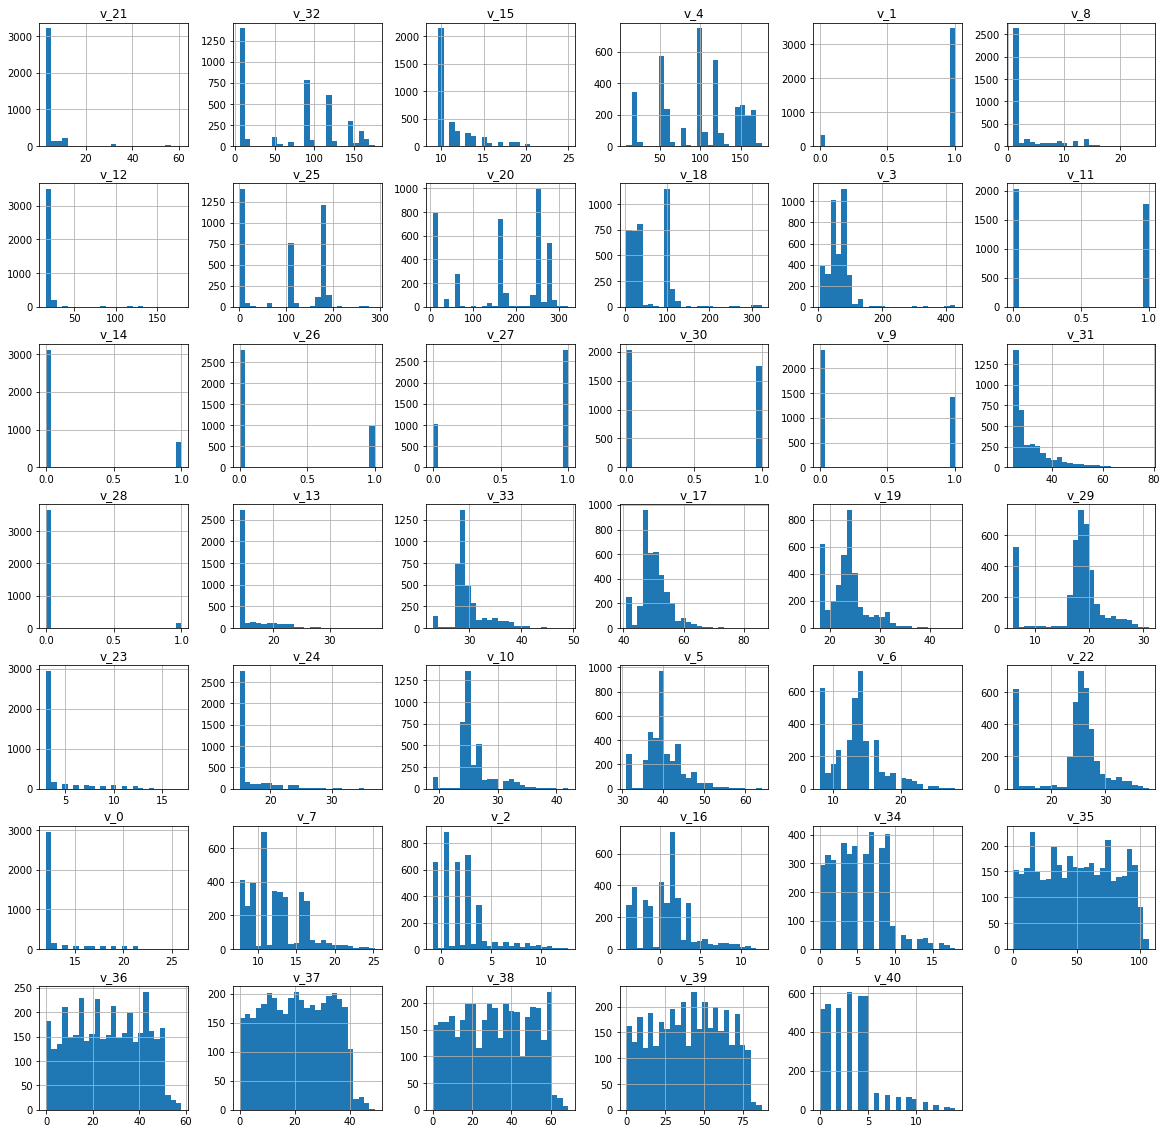

In [11]:
df.hist(figsize = (20 , 20) , bins = 25);

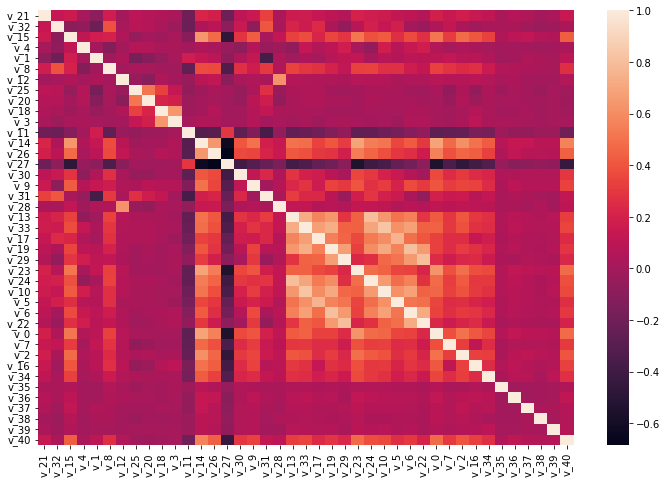

In [12]:
fig_dims = (12 , 8)
fig,ax = plt.subplots(figsize = fig_dims)
sns.heatmap(df.corr());

<AxesSubplot:>

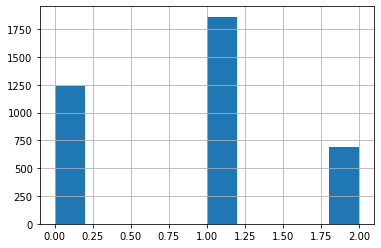

In [13]:
y.hist()

# Preprocessing and Visulization

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import MinMaxScaler



In [15]:
from sklearn import set_config
set_config(display = 'diagram')

In [16]:
pipe = ColumnTransformer([('scale' , MinMaxScaler() , ['v_16','v_2', 'v_8','v_7','v_34','v_35','v_36','v_37','v_38','v_39','v_40','v_32','v_4', 'v_3', 'v_20', 'v_21', 'v_18', 'v_25', 'v_12'])] , remainder = 'passthrough')
pipe
# pipe = ColumnTransformer([('scale' , 'passthrough' , ['v_16','v_2', 'v_8','v_7','v_34','v_35','v_36','v_37','v_38','v_39','v_40','v_32','v_4', 'v_3', 'v_20', 'v_21', 'v_18', 'v_25', 'v_12'])] , remainder = 'passthrough')
# pipe

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['v_16', 'v_2', 'v_8', 'v_7', 'v_34', 'v_35',
                                  'v_36', 'v_37', 'v_38', 'v_39', 'v_40',
                                  'v_32', 'v_4', 'v_3', 'v_20', 'v_21', 'v_18',
                                  'v_25', 'v_12'])])

In [17]:
df_scaled = pd.DataFrame(pipe.fit(df).fit_transform(df) , columns = df.columns)

In [18]:
df.head()

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,3,6,11,55,1,1,16,5,60,30,...,13.9,-0.3,0.79,1,93,47,1,48,26,0
1,8,94,12,65,1,4,22,4,173,199,...,14.9,5.4,6.51,6,29,37,25,53,35,7
2,3,166,10,155,1,1,16,1,309,30,...,11.1,0.6,2.02,1,8,34,4,43,38,2
3,3,6,13,121,1,1,16,1,6,23,...,11.1,0.6,2.02,7,37,40,27,43,65,0
4,4,51,18,21,1,17,22,118,168,106,...,10.9,8.4,12.51,16,22,25,25,24,23,1


In [19]:
df_scaled.head()

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,0.292698,0.037037,0.000000,0.357955,0.055556,0.869159,0.810345,0.020408,0.695652,0.298851,...,48.0,24.0,22.0,3.0,15.0,25.0,37.0,14.0,28.0,12.0
1,0.637900,0.459259,0.125000,0.414773,0.333333,0.271028,0.637931,0.510204,0.768116,0.402299,...,55.0,27.0,18.0,4.0,19.0,26.0,46.0,13.0,27.0,13.0
2,0.366928,0.103704,0.000000,0.198864,0.055556,0.074766,0.586207,0.081633,0.623188,0.436782,...,48.0,24.0,19.0,3.0,15.0,25.0,37.0,12.0,25.0,12.0
3,0.366928,0.103704,0.000000,0.198864,0.388889,0.345794,0.689655,0.551020,0.623188,0.747126,...,48.0,25.0,19.0,3.0,15.0,27.0,40.0,15.0,25.0,12.0
4,1.000000,0.681481,0.666667,0.187500,0.888889,0.205607,0.431034,0.510204,0.347826,0.264368,...,61.0,41.0,29.0,7.0,28.0,32.0,50.0,27.0,30.0,14.0


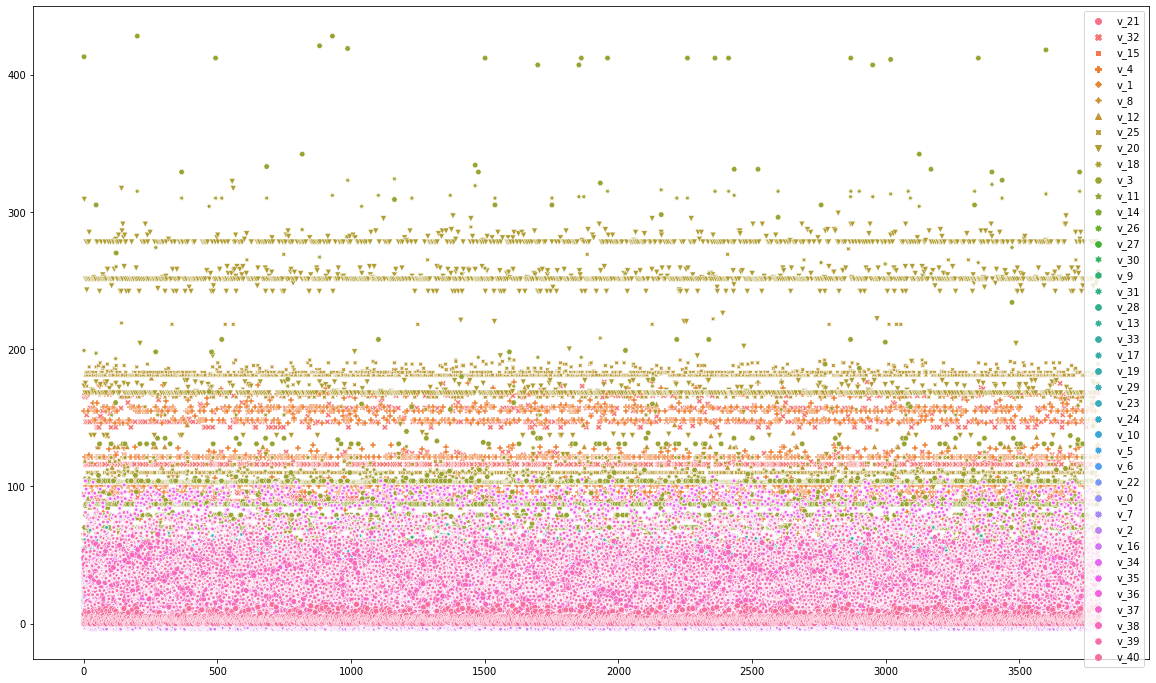

In [20]:
fig_dims = (20 , 12)
fig,ax = plt.subplots(figsize = fig_dims)
sns.scatterplot(data=df[df.columns]);
# sns.scatterplot(data=df['v_36']);

<AxesSubplot:>

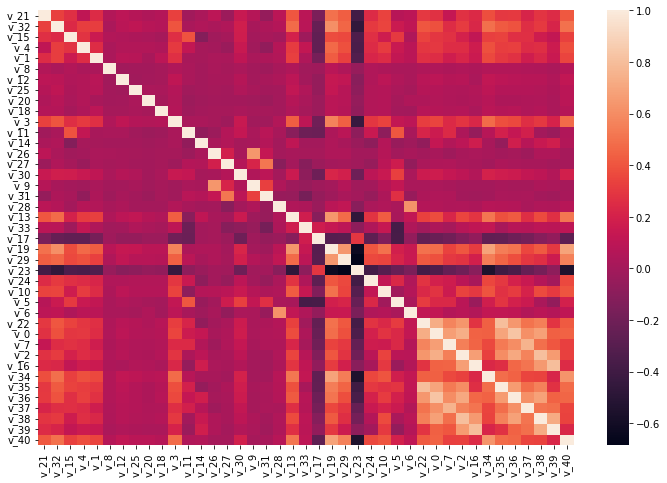

In [21]:
fig_dims = (12 , 8)
fig,ax = plt.subplots(figsize = fig_dims)
sns.heatmap(df_scaled.corr())


## Feature Selection

In [22]:
# from sklearn.feature_selection import SelectKBest , chi2
# fit = SelectKBest(chi2 , k=30).fit(df_scaled , y)
# df_selected = pd.DataFrame(SelectKBest(chi2 , k=30).fit_transform(df_scaled , y))
# df_selected.shape

In [23]:
# fit_scores = pd.DataFrame(fit.scores_)
# fit_columns = pd.DataFrame(df.columns)
# feature_score = pd.concat((fit_scores , fit_columns) , axis = 1)
# feature_score.columns = ['score' , 'feat']
# print(feature_score)

In [24]:
# low = feature_score.nsmallest(11 ,'score' )
# l = list(low.index)
# index = list(low['feat'])
# index


In [25]:
# fig_dims = (12 , 8)
# fig,ax = plt.subplots(figsize = fig_dims)
# sns.heatmap(df_selected.corr())

Train_Test_Split

In [26]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test  = train_test_split(df_scaled , y , test_size = 0.20, random_state = 1)
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(3036, 41) (760, 41) (3036,) (760,)


<AxesSubplot:>

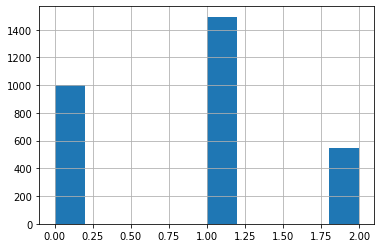

In [27]:
y_train.hist()

<AxesSubplot:>

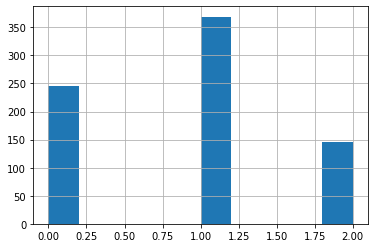

In [28]:
y_test.hist()

# Model Training and HyperParameter Tuning

Logistic classifier

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression(random_state = 10 , max_iter = 5000)

In [31]:
# lr.fit(X_train , y_train)
# print(lr.score(X_train , y_train))
# lr.score(X_test , y_test)

In [32]:
# from sklearn.model_selection import GridSearchCV
# param_grid = [{'C' : range(1 , 20) ,'class_weight': ['' , 'balanced'] }]
 

In [33]:
# cv = GridSearchCV(lr , param_grid= param_grid , cv = 5 ,return_train_score=True)
# cv.fit(X_train , y_train)
# cv.best_params_

Support Vector Machine

In [34]:
from sklearn.svm import SVC

In [35]:
svm = SVC(random_state = 10)

In [36]:
# svm.fit(X_train , y_train)
# print(svm.score(X_train , y_train))
# svm.score(X_test , y_test)

In [37]:
# param_grid = [{ 'C' : range(10) }]
# Gcv = GridSearchCV(svm , param_grid = param_grid , cv = 3)
# Gcv.fit(X_train , y_train)

In [38]:
# Gcv.best_score_
# Gcv.best_estimator_
# Gcv.best_params_

In [39]:
svm.set_params(gamma= 'scale', kernel= 'linear', probability = True)

SVC(kernel='linear', probability=True, random_state=10)

In [40]:
# svm.fit(X_train , y_train)
# print(svm.score(X_train , y_train))
# svm.score(X_test , y_test)

Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 10)

In [42]:
rfc.fit(X_train , y_train)
print(rfc.score(X_train , y_train))
rfc.score(X_test , y_test)

1.0


0.7578947368421053

MLP Classifier

In [43]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter = 800 , random_state = 10)


In [44]:
mlp.fit(X_train , y_train)
print(mlp.score(X_train , y_train))
mlp.score(X_test , y_test)

0.7457180500658761


0.7105263157894737

AdaBoost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier( random_state = 10 ,n_estimators = 500)


In [46]:
abc.fit(X_train , y_train)
print(abc.score(X_train , y_train))
abc.score(X_test , y_test)

0.7852437417654808


0.6986842105263158

GradBoost

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()


In [48]:
# gbc.fit(X_train , y_train)
# print(gbc.score(X_train , y_train))
# gbc.score(X_test , y_test)

Voting Classifier

In [49]:
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators = [('rfc' , rfc) , ('mlp' , mlp),('abc' , abc),('gbc' , gbc)], voting = 'soft')
# voting_classifier.fit(X_train , y_train)
# pred_train = voting_classifier.predict(X_train)
# pred_test = voting_classifier.predict(X_test)

In [50]:
# print(voting_classifier.score(X_train , y_train))
# voting_classifier.score(X_test , y_test)

In [51]:
voting_classifier.fit(df_scaled , y)

VotingClassifier(estimators=[('rfc', RandomForestClassifier(random_state=10)),
                             ('mlp',
                              MLPClassifier(max_iter=800, random_state=10)),
                             ('abc',
                              AdaBoostClassifier(n_estimators=500,
                                                 random_state=10)),
                             ('gbc', GradientBoostingClassifier())],
                 voting='soft')

# Preprocessing on Test data

In [52]:
test = pd.read_csv('/kaggle/input/students-drop-out-prediction/test.csv')
test.head()




,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,0,9,90,15,121,1,8,23,114,256,...,10.8,10.4,6.74,4,96,36,34,23,72,5
1,1,7,123,14,126,1,5,19,3,40,...,19.4,0.5,6.79,15,78,12,25,27,67,12
2,2,3,6,10,102,1,1,16,181,168,...,7.6,2.6,0.32,4,81,47,30,54,23,4
3,3,3,6,10,148,1,1,16,110,278,...,11.1,0.6,2.02,4,100,6,23,12,28,1
4,4,3,6,10,148,1,1,16,1,168,...,7.6,2.6,0.32,7,97,25,30,18,52,0


In [53]:
test_ = test.drop(labels = 'id' , axis = 1 )
# test_ = test
test_.shape


(1628, 41)

In [54]:
test__ = pd.DataFrame(pipe.fit_transform(test_),columns = test_.columns)


# test_.head()

In [55]:
# test___ = test__.drop(labels = index , axis = 1 )
 
# test___.shape

In [56]:
final_pred = voting_classifier.predict(test__)

# Final Submission

In [57]:
final_pred_ = pd.DataFrame({'id' : test.id , 'label' : final_pred})
final_pred_.to_csv('dummy_sub_2.csv' , index = False)